In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

### Read the data

In [3]:
# READ THE STATIONS AND SPECIES/LABELS FROM THE DATASET
with xr.open_dataset('../data/scattering_coefficients_32_32.nc') as dset:
    scat_coef_1 = dset['scat_coef_1'].mean(dim='comp')
    scat_coef_1 /= scat_coef_1.max(dim=('frequency_0','frequency_1'))
    species_labels = dset['species'].to_numpy()
    station_labels = dset['station'].to_numpy()
    distance_labels = dset['distance'].to_numpy()

### Figure of the paper

/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/steinre/anaconda3/envs/seissavanna_v2/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/steinre/anaconda3/envs/seissav

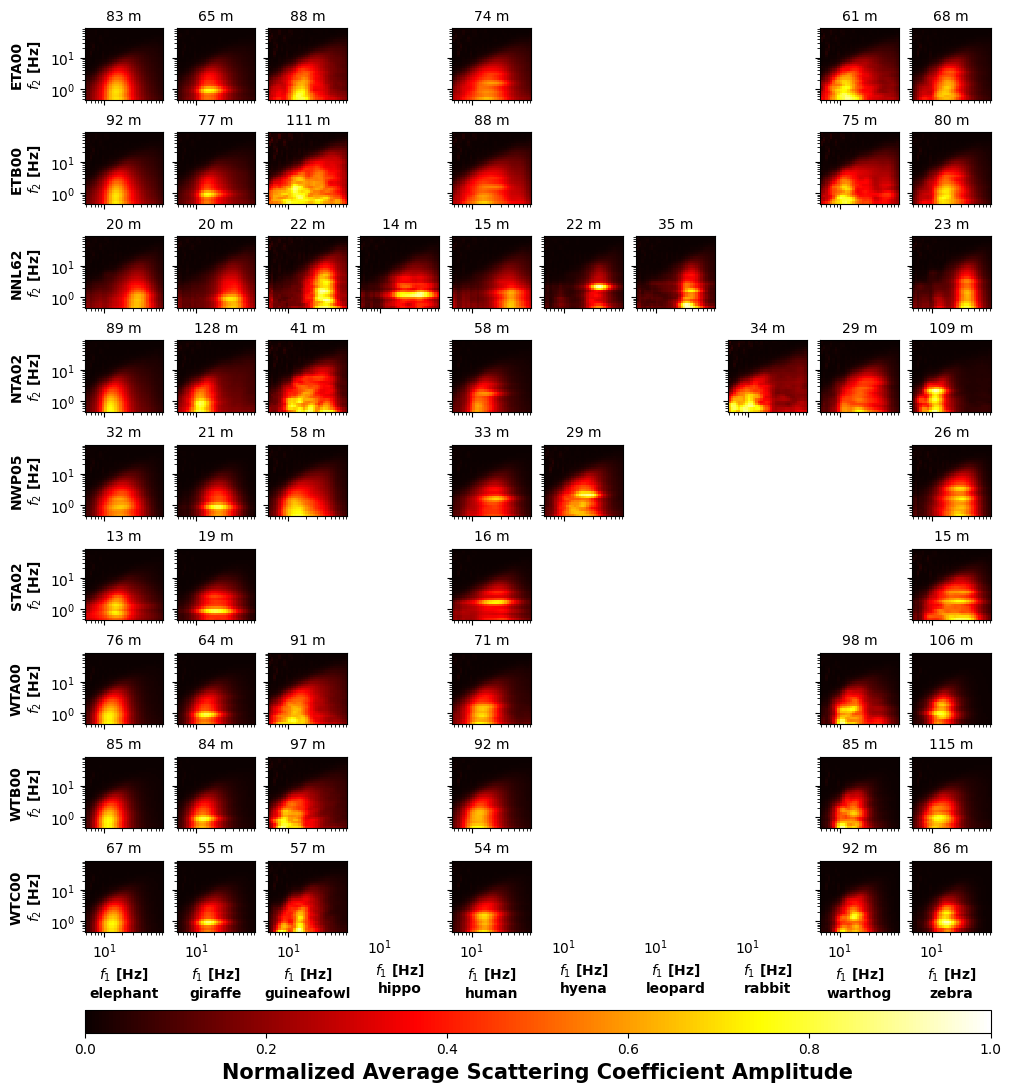

In [4]:
unique_species = np.unique(species_labels)
unique_stations = np.unique(station_labels)

fig, axes = plt.subplots(len(unique_stations), len(unique_species), figsize=(len(unique_species), 1.2*len(unique_stations)), sharex=True, sharey=True, constrained_layout=True)

axes[0][0].set_xscale('log')
axes[0][0].set_yscale('log')

# loop over the unique stations and species
for i, station_key in enumerate(unique_stations):

    where_station = station_labels == station_key

    for j, species_key in enumerate(unique_species):

        # get the mean scattering coefficients for a species-station pair
        where_species = species_labels == species_key
        where = np.logical_and(where_station, where_species)
        mean_scat_coef_1 = scat_coef_1[where].mean(dim='traces')
        mean_distance = np.mean(distance_labels[where])

        ax = axes[i, j]

        mappable = ax.pcolormesh(scat_coef_1.frequency_0,scat_coef_1.frequency_1,mean_scat_coef_1.T, cmap='hot',vmin=0, vmax=1)

        if j == 0:
            ax.set_ylabel('%s\n$f_2$ [Hz]' % station_key, fontsize=10, weight='bold')
        
        if i == len(unique_stations)-1:
            ax.set_xlabel('$f_1$ [Hz]\n%s' % species_key, fontsize=10, weight='bold')

        if np.isnan(mean_scat_coef_1).any() == True:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.tick_params(axis='both', which='both', length=0)
            
        if np.isnan(mean_scat_coef_1).any() == False:
            ax.set_title('%d m' % mean_distance, fontsize=10)
            
cbar = plt.colorbar(mappable, ax=axes.ravel().tolist(), orientation='horizontal',aspect=40, pad=0.01)
cbar.set_label('Normalized Average Scattering Coefficient Amplitude', fontsize=15, weight='bold')